In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams["font.size"] = 18

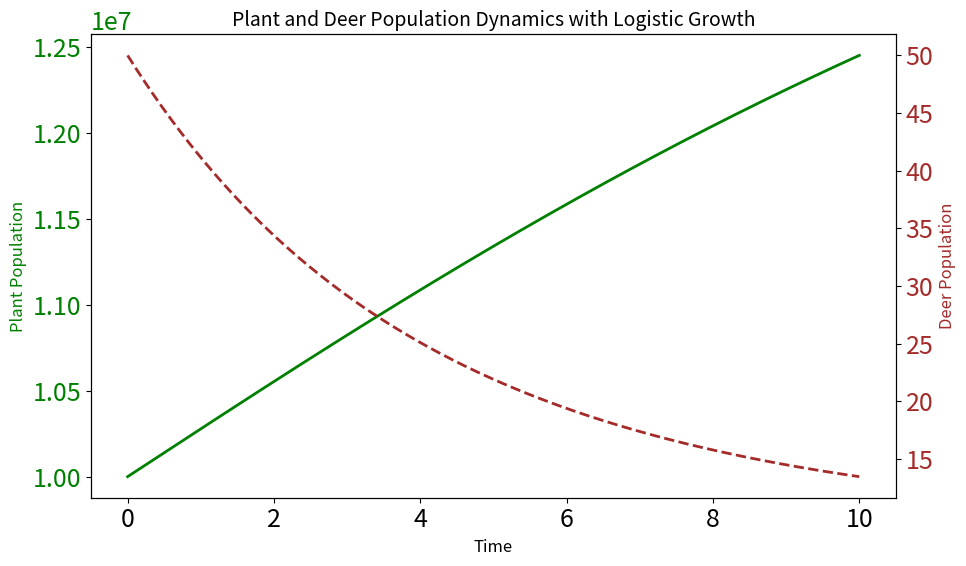

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 初期条件
p0 = 1e7  # 植物の初期個体数
x0 = 50   # シカの初期個体数
initial_state = [p0, x0]

# パラメータの設定
T = 10
r = 0.1      # 植物の成長率
K = p0 * 1.5      # 環境の植物収容力
alpha = 1095 / p0  # シカの摂食率
beta = alpha * 0.0005 # シカの成長効率
gamma = 1/4   # シカの自然死亡率
H = 0.5       # 狩猟率

# 微分方程式の定義（ロジスティック項を追加）
def ecosystem_with_logistic_growth(state, t):
    p, x = state  # p:植物の個体数, x:シカの個体数
    dpdt = r * p * (1 - p / K) - alpha * p * x  # ロジスティック成長
    dxdt = beta * p * x - gamma * x - H * x
    return [dpdt, dxdt]

# 時間範囲の設定
t = np.linspace(0, T, 1000)

# 微分方程式の数値解法
solution_with_logistic = odeint(ecosystem_with_logistic_growth, initial_state, t)
p_logistic, x_logistic = solution_with_logistic.T  # 結果を植物とシカに分ける

# 双軸グラフの描画
fig, ax1 = plt.subplots(figsize=(10, 6))

# 左軸（植物の個体数）
ax1.plot(t, p_logistic, label="Plants (p)", color='green', linewidth=2)
ax1.set_xlabel("Time", fontsize=12)
ax1.set_ylabel("Plant Population", fontsize=12, color='green')
ax1.tick_params(axis='y', labelcolor='green')

# 右軸（シカの個体数）
ax2 = ax1.twinx()
ax2.plot(t, x_logistic, label="Deer (x)", color='brown', linestyle='--', linewidth=2)
ax2.set_ylabel("Deer Population", fontsize=12, color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

# タイトルと凡例
plt.title("Plant and Deer Population Dynamics with Logistic Growth", fontsize=14)
fig.tight_layout()
plt.show()